# **MONKEYPOX DETECTION USING DEEP LEARNING MODELS AND EXPLAINABLE AI WITH FEDERATED LEARNING**



---



RATIONELE FOR PROJECT

Mpox, formerly known as monkeypox, is a rare but potentially serious viral disease caused by the monkeypox virus, a species of the genus Orthopoxvirus (World Health Organization, 2024). The disease has two distinct clades: clade I (with subclades Ia and Ib) and clade II (with subclades IIa and IIb), with clade II being the most recent mpox that has caused a global outbreak in 2024 (CDC, 2024). The focus of this project is to examine how Machine Learning models can be utilized to accurately diagnose specific disease through classification and detection techniques while considering racial bias. The ongoing global outbreak of clade II has caused more than 100 00 cases in 122 countries, including 115 countries where Mpox was not reported previously (CDC, 2024).

The fatality rate of Mpox can reach up to 11% depending on the strain and the health condition of the affected individual, with the Clade I having a mortality rate of around 3.6% (Mpox Virus: Clade I and Clade II, n.d). There is no specific treatment for Mpox, antiviral medications like tecovirimat (TPOXX) can help mitigate symptoms, but these treatments are not accessible in underprivileged areas (CDC, 2024). With the ongoing violence in the Democratic Republic of Congo, efforts to control Mpox have been severely hindered by ongoing violence, which results in higher transmission rates and delayed responses.

The traditional diagnosis method is PCR testing, and Serological testing, where PCR is the primary method that uses samples from skin lesions and is the most preferred because of its high sensitivity and specificity, while Serological tests detect antibodies, but this test is less reliable due to its cross-reactivity with other orthopoxviruses (Khehra, Padda and Swift, 2023). Both these methods have their limitations, and these include the need for specialized equipment and trained personnel and the potential for false negatives due to viral mutations. Enhancing diagnostic accuracy and accessibility, especially in resource-limited environments, requires the development of a reliable computer-based framework for the detection of Mpox disease. The goal is to provide an accessible, reliable tool that aids healthcare professionals in conflict zones and underprivileged areas

AIMS AND OBJECTIVES

AIM

To implement a robust, privacy-preserving, racially fair, and explainable Deep Learning framework integrated with Federated Learning for early and accurate Mpox detection.

OBJECTIVES

1.    Implement a Deep Learning model using Transfer Learning and Federated Learning on diverse skin lesion datasets to accurately classify Mpox.

2.    Assess and mitigate the impact of skin tone variations on model performance to ensure racial fairness in diagnosis.

3.    Integrate and evaluate Explainable AI techniques such as Grad-CAM and LIME to improve transparency and trustworthiness of the model’s predictions.

4.    Benchmark the proposed framework against traditional diagnostic methods and recent Deep Learning approaches using robust cross-validation techniques.





---



## 1. IMPORT IMPORTANT LIBRARIES

In [1]:
pip install imgaug opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you ha

In [2]:
pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you 

In [3]:
!pip install tensorflow

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os
import shutil
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
#import imgaug.augmenters as iaa
from skimage import io
#from imgaug.augmentables.segmaps import SegmentationMapsOnImage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

2025-10-30 17:16:18.752685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761844578.987501      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761844579.043520      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.applications import ResNet152V2
from keras.applications import ResNet152V2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import cv2

In [6]:
df=pd.read_csv('/kaggle/input/hsv-color/HSV Color Space Augmentation Dataset/balanced_dataset.csv')
df

,Lesion_Id,Image_Id,Diagnosis,Image_Path,Fold,Split
0,MKP_76_01,MKP_76_01_ORIGINAL_hsvaug_104,Monkeypox,C:\Datasets\color_images\MKP_76_01_ORIGINAL_hs...,fold1_AUG,Train
1,MKP_114_01,MKP_114_01_ORIGINAL_hsvaug_021,Monkeypox,C:\Datasets\color_images\MKP_114_01_ORIGINAL_h...,fold1_AUG,Train
2,MKP_74_03,MKP_74_03_ORIGINAL_hsvaug_163,Monkeypox,C:\Datasets\color_images\MKP_74_03_ORIGINAL_hs...,fold2_AUG,Train
3,MKP_58_05,MKP_58_05_ORIGINAL_hsvaug_095,Monkeypox,C:\Datasets\color_images\MKP_58_05_ORIGINAL_hs...,fold5_AUG,Train
4,MKP_72_07,MKP_72_07_ORIGINAL_hsvaug_140,Monkeypox,C:\Datasets\color_images\MKP_72_07_ORIGINAL_hs...,fold1_AUG,Train
...,...,...,...,...,...,...
201955,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_176,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201956,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_177,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201957,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_178,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201958,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_179,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train


In [7]:
# Drop Lesion_Id column inplace
df.drop(columns=['Lesion_Id'], inplace=True)

# Verify it was removed
print(df.columns)

Index(['Image_Id', 'Diagnosis', 'Image_Path', 'Fold', 'Split'], dtype='object')


In [8]:
# Step 1: Define new path
new_base_path = "/kaggle/input/hsv-color/HSV Color Space Augmentation Dataset/balanced_images"

# Step 2: Rebuild the Image_Path column
df["Image_Path"] = df["Image_Id"].apply(lambda x: os.path.join(new_base_path, f"{x}.jpg"))

# Step 3: Remove duplicates
df_cleaned = df.drop_duplicates(subset=['Image_Id', 'Image_Path'], keep='first')

# Step 4: Save final cleaned dataset
df_cleaned.to_csv("cleaned_and_updated_dataset.csv", index=False)

print("✅ Image paths rebuilt, duplicates removed, and dataset saved!")

✅ Image paths rebuilt, duplicates removed, and dataset saved!


In [9]:
# Use correct column name
label_encoder = LabelEncoder()
df['Updated_Diagnosis_Label'] = label_encoder.fit_transform(df['Diagnosis'])
# Get mapping from label to encoded value
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Display result
print("✅ Label Encoding Mapping:")
print(label_mapping)

✅ Label Encoding Mapping:
{'Chickenpox': 0, 'Cowpox': 1, 'HFMD': 2, 'Healthy': 3, 'Measles': 4, 'Monkeypox': 5}


In [10]:
# Calculate class weights
class_counts = df['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 6.0, 1: 6.0, 2: 6.0, 3: 6.0, 4: 6.0, 5: 6.0}


In [11]:
df

,Image_Id,Diagnosis,Image_Path,Fold,Split,Updated_Diagnosis_Label
0,MKP_76_01_ORIGINAL_hsvaug_104,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
1,MKP_114_01_ORIGINAL_hsvaug_021,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
2,MKP_74_03_ORIGINAL_hsvaug_163,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold2_AUG,Train,5
3,MKP_58_05_ORIGINAL_hsvaug_095,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold5_AUG,Train,5
4,MKP_72_07_ORIGINAL_hsvaug_140,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
...,...,...,...,...,...,...
201955,MSL_23_01_ORIGINAL_hsvaug_176,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201956,MSL_23_01_ORIGINAL_hsvaug_177,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201957,MSL_23_01_ORIGINAL_hsvaug_178,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201958,MSL_23_01_ORIGINAL_hsvaug_179,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4


# ***EXPLORATORY DATA ANALYSIS***

This phase involves thoroughly exploring and analyzing the dataset that will be used to develop and evaluate the model.  It focuses on gaining an understanding of the dataset that will be used to train and test the machine-learning models. Understanding the data’s structure and content is essential for ensuring that the models are accurately trained and validated.

In [12]:
import pandas as pd
from IPython.display import display, HTML

# === Step 1: Define your dataset ===
# Example: df = pd.read_csv('your_dataset.csv')

# === Step 2: Define feature descriptions ===
feature_descriptions = {
    'Image_Id': 'Name of the specific image (includes augmentation info).',
    'Diagnosis': 'The disease class label (e.g., Monkeypox, Measles, Cowpox, etc.).',
    'Image_Path': 'Full directory path to the image file.',
    'Fold': 'Cross-validation fold group (e.g., fold1_AUG, fold2_AUG).',
    'Split': 'Dataset split (Train, Validation, or Test).',
    'Updated_Diagnosis_Label': 'Encoded numeric label corresponding to the Diagnosis.'
}

# === Step 3: Build the summary table ===
feature_table = pd.DataFrame({
    'Feature': df.columns,
    'Type': [df[col].dtype for col in df.columns],
    'Missing Values': [df[col].isna().sum() for col in df.columns],
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Description': [feature_descriptions.get(col, 'No description available') for col in df.columns]
})

# === Step 4: Format and display ===
styled_table = feature_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#00A6A6'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{
    'border': '1px solid #ddd',
    'padding': '6px',
    'font-size': '12px'
})

display(HTML(styled_table.to_html()))

,Feature,Type,Missing Values,Unique Values,Description
0,Image_Id,object,0,99782,Name of the specific image (includes augmentation info).
1,Diagnosis,object,0,6,"The disease class label (e.g., Monkeypox, Measles, Cowpox, etc.)."
2,Image_Path,object,0,99782,Full directory path to the image file.
3,Fold,object,0,5,"Cross-validation fold group (e.g., fold1_AUG, fold2_AUG)."
4,Split,object,0,1,"Dataset split (Train, Validation, or Test)."
5,Updated_Diagnosis_Label,int64,0,6,Encoded numeric label corresponding to the Diagnosis.


In [13]:
import pandas as pd
from IPython.display import display, HTML

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

# === 1️⃣ Categorical Features Summary ===
cat_summary = pd.DataFrame({
    'Feature': categorical_features,
    'Type': 'Categorical',
    'Missing Values': [df[col].isna().sum() for col in categorical_features],
    'Unique Values': [df[col].nunique() for col in categorical_features],
    'Most Frequent Value': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in categorical_features],
    'Frequency': [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0 for col in categorical_features]
})

# === 2️⃣ Numerical Features Summary ===
num_summary = pd.DataFrame({
    'Feature': numerical_features,
    'Type': 'Numerical',
    'Missing Values': [df[col].isna().sum() for col in numerical_features],
    'Unique Values': [df[col].nunique() for col in numerical_features],
    'Mean': [df[col].mean() for col in numerical_features],
    'Std Dev': [df[col].std() for col in numerical_features],
    'Min': [df[col].min() for col in numerical_features],
    '25th Percentile': [df[col].quantile(0.25) for col in numerical_features],
    'Median': [df[col].median() for col in numerical_features],
    '75th Percentile': [df[col].quantile(0.75) for col in numerical_features],
    'Max': [df[col].max() for col in numerical_features]
})

# === 3️⃣ Styling for readability ===
def styled_table(dataframe, title, color):
    styled = (
        dataframe.style.set_caption(title)
        .set_table_styles([
            {'selector': 'caption', 'props': [('caption-side', 'top'),
                                              ('font-size', '16px'),
                                              ('font-weight', 'bold'),
                                              ('color', color),
                                              ('text-align', 'center'),
                                              ('padding', '10px 0')]},
            {'selector': 'th', 'props': [('background-color', color),
                                         ('color', 'white'),
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center'),
                                         ('border', '1px solid #ddd'),
                                         ('padding', '5px')]}
        ])
        .format(precision=2)
    )
    return styled

display(HTML("<h3>📊 Summary Statistics by Feature Type</h3>"))

display(styled_table(cat_summary, "Categorical Features Summary", "#2E8B57"))  # green
display(styled_table(num_summary, "Numerical Features Summary", "#4682B4"))  # blue


,Feature,Type,Missing Values,Unique Values,Most Frequent Value,Frequency
0,Image_Id,Categorical,0,99782,CHP_05_01_ORIGINAL_hsvaug_005,5
1,Diagnosis,Categorical,0,6,Chickenpox,33660
2,Image_Path,Categorical,0,99782,/kaggle/input/hsv-color/HSV Color Space Augmentation Dataset/balanced_images/CHP_05_01_ORIGINAL_hsvaug_005.jpg,5
3,Fold,Categorical,0,5,fold1_AUG,40832
4,Split,Categorical,0,1,Train,201960


,Feature,Type,Missing Values,Unique Values,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
0,Updated_Diagnosis_Label,Numerical,0,6,2.50,1.71,0,1.00,2.50,4.00,5


## Class Distribution

Goal: Check class balance among different diseases.

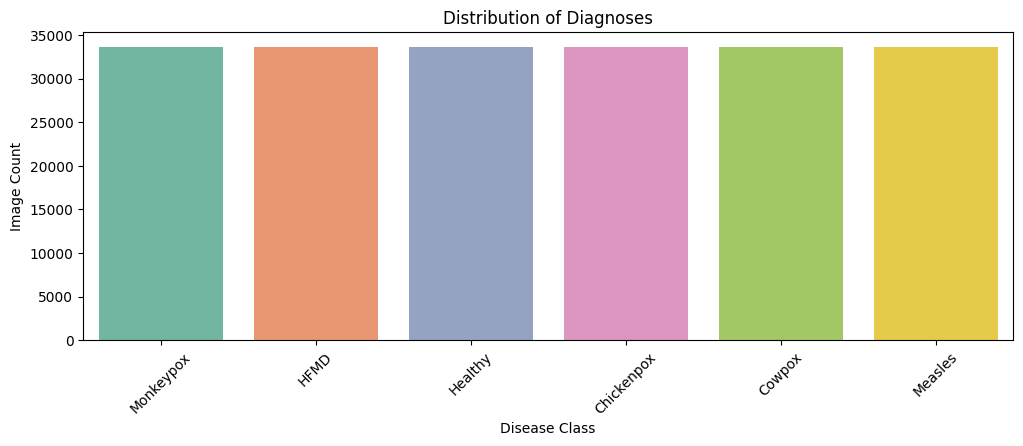

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnoses')
plt.xlabel('Disease Class')
plt.ylabel('Image Count')
plt.xticks(rotation=45)
plt.show()

## Updated Label Mapping

Goal: Verify that numeric labels correspond correctly to disease names.

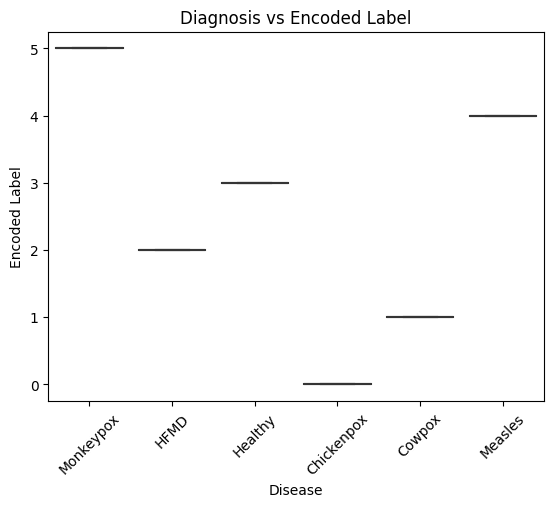

In [15]:
sns.boxplot(x='Diagnosis', y='Updated_Diagnosis_Label', data=df, palette='viridis')
plt.title('Diagnosis vs Encoded Label')
plt.xlabel('Disease')
plt.ylabel('Encoded Label')
plt.xticks(rotation=45)
plt.show()

## Sample Diversity Across Classes

Goal: Show that images for each disease have visual variation (color, shape, texture).
Method: Display random image grids per class.

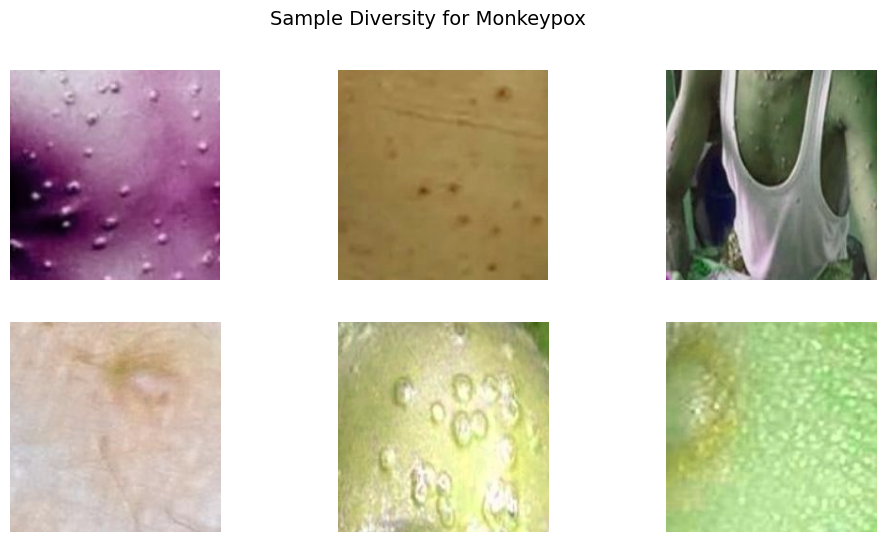

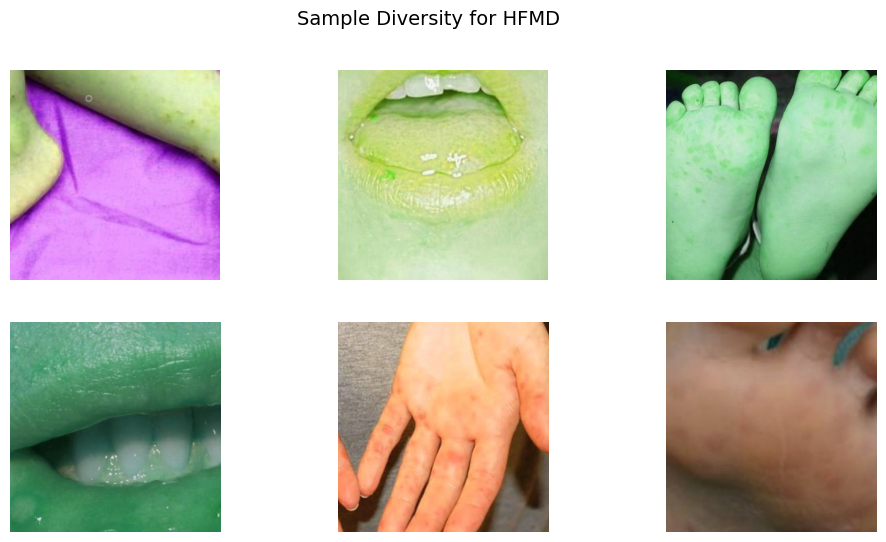

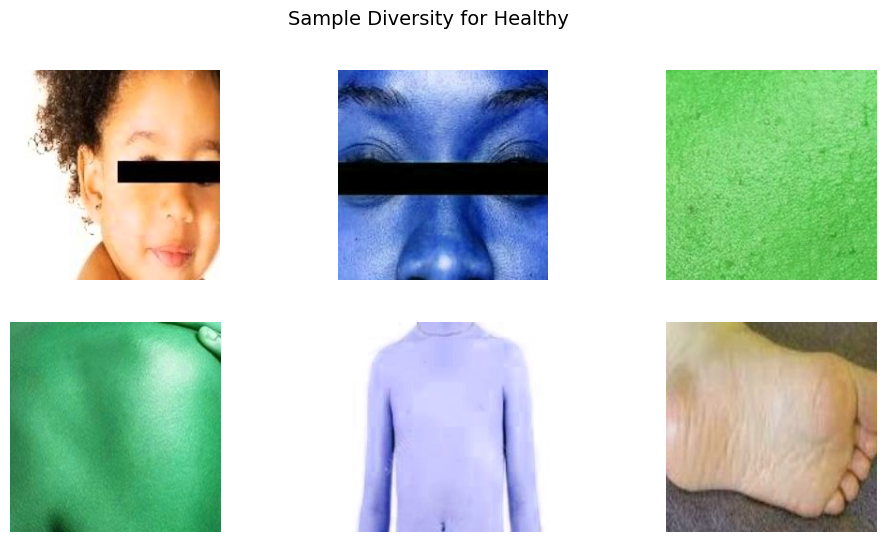

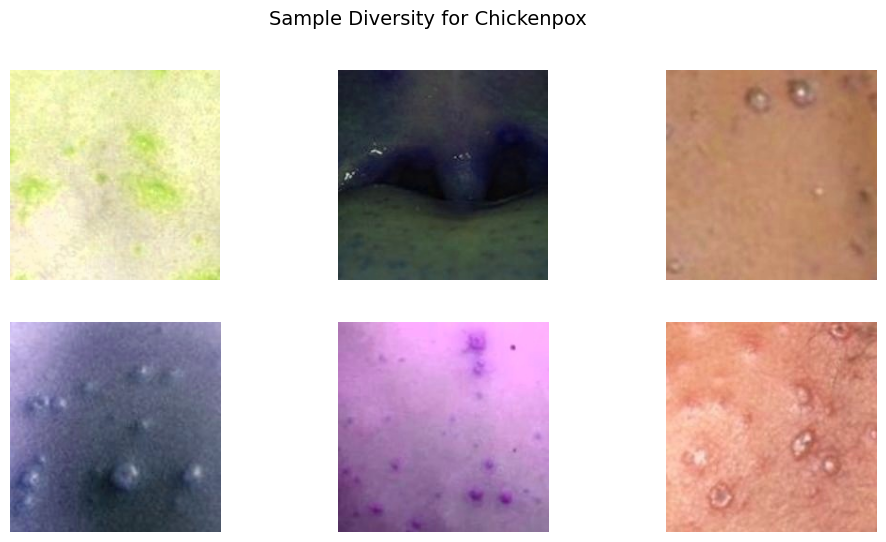

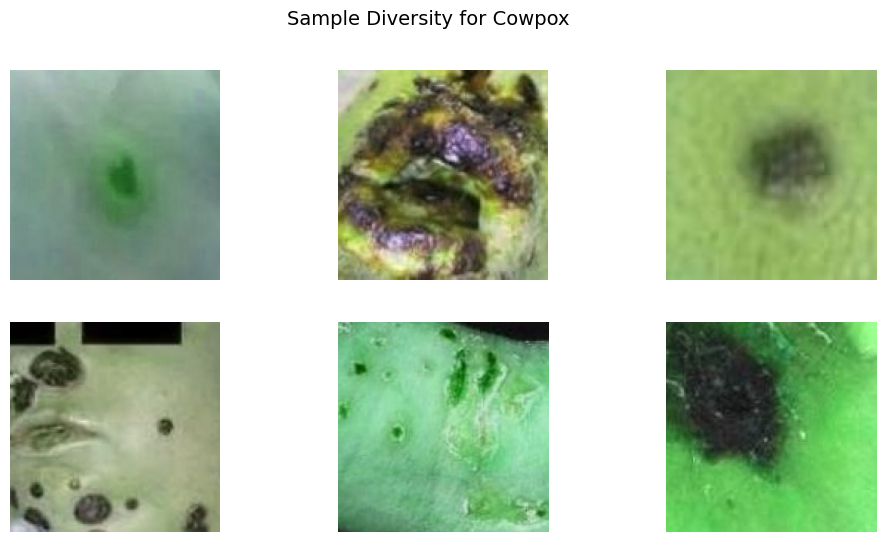

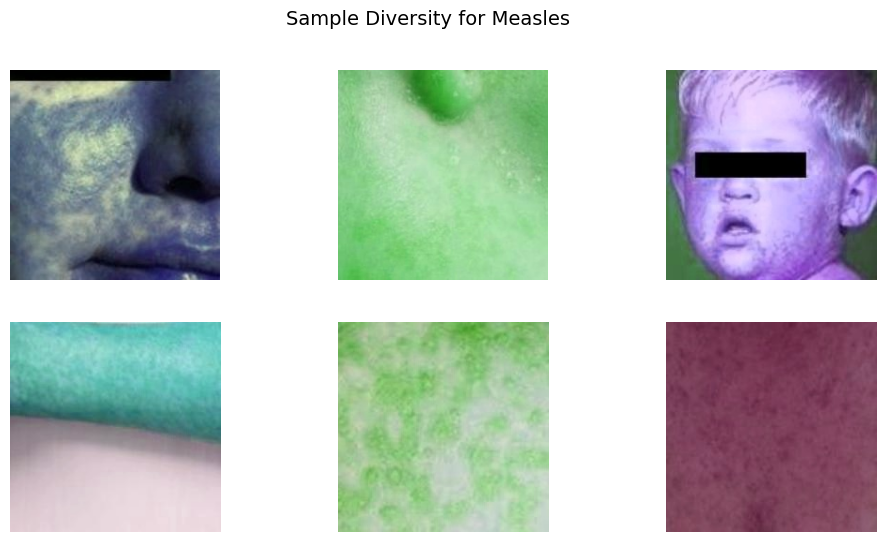

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

classes = df['Diagnosis'].unique()

for disease in classes:
    sample_paths = df[df['Diagnosis'] == disease]['Image_Path'].sample(6, random_state=42)
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Sample Diversity for {disease}', fontsize=14)
    for i, path in enumerate(sample_paths):
        img = mpimg.imread(path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


## Color Distribution (Hue/Saturation/Value)

Goal: Assess image color diversity and check for augmentation bias.
Method: Plot histograms for HSV color channels.

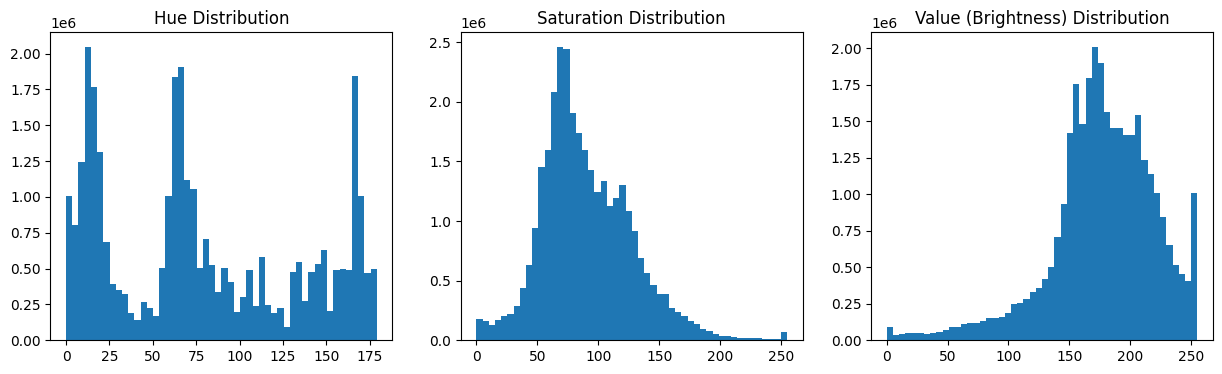

In [17]:
import cv2
import numpy as np

# Convert sample images to HSV and collect statistics
sample_images = df['Image_Path'].sample(200, random_state=42)
hues, sats, vals = [], [], []

for path in sample_images:
    img = cv2.imread(path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img_hsv)
    hues.extend(h.flatten())
    sats.extend(s.flatten())
    vals.extend(v.flatten())

plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.hist(hues, bins=50); plt.title("Hue Distribution")
plt.subplot(1,3,2); plt.hist(sats, bins=50); plt.title("Saturation Distribution")
plt.subplot(1,3,3); plt.hist(vals, bins=50); plt.title("Value (Brightness) Distribution")
plt.show()

## Image Size and Resolution Variation

Goal: Check if all images are consistent in dimensions.
Method: Compute image width and height distribution.

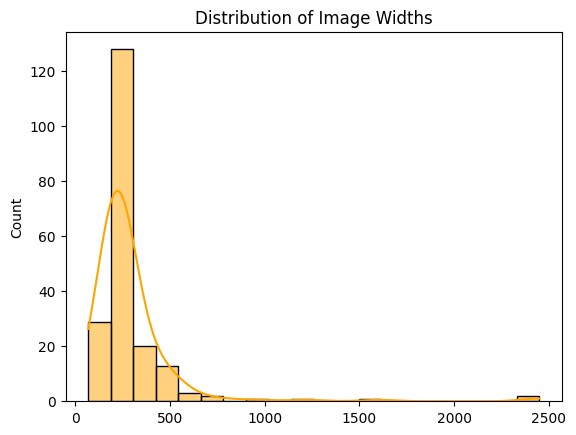

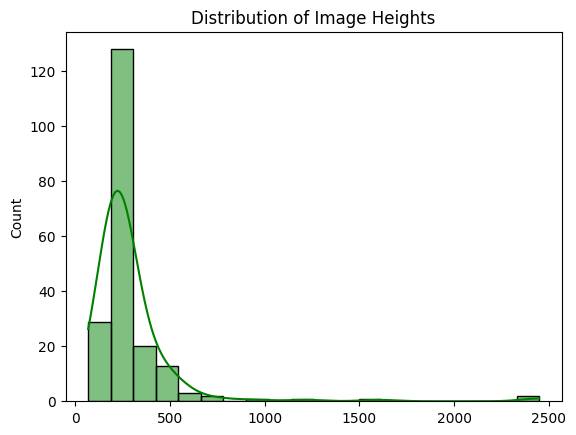

In [18]:
widths, heights = [], []

for path in sample_images:
    img = cv2.imread(path)
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)

sns.histplot(widths, bins=20, color='orange', kde=True)
plt.title('Distribution of Image Widths')
plt.show()

sns.histplot(heights, bins=20, color='green', kde=True)
plt.title('Distribution of Image Heights')
plt.show()


## Noise & Blurriness Detection

Goal: Quantify clarity — detect blurry or noisy images.
Method: Use variance of Laplacian (low variance = blurry).

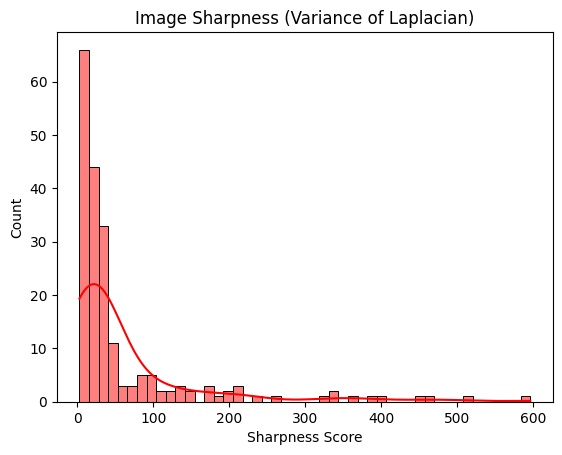

In [19]:
blurriness_scores = []

for path in sample_images:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    variance = cv2.Laplacian(img, cv2.CV_64F).var()
    blurriness_scores.append(variance)

sns.histplot(blurriness_scores, kde=True, color='red')
plt.title('Image Sharpness (Variance of Laplacian)')
plt.xlabel('Sharpness Score')
plt.ylabel('Count')
plt.show()


## Duplicate Image Check

Goal: Identify whether augmentation created near-identical samples.
Method: Compare perceptual hashes.

In [20]:
from PIL import Image
import imagehash

hashes = {}
duplicates = []

for path in sample_images:
    img = Image.open(path)
    h = imagehash.average_hash(img)
    if h in hashes:
        duplicates.append((path, hashes[h]))
    else:
        hashes[h] = path

print(f"Found {len(duplicates)} potential duplicates.")


Found 5 potential duplicates.


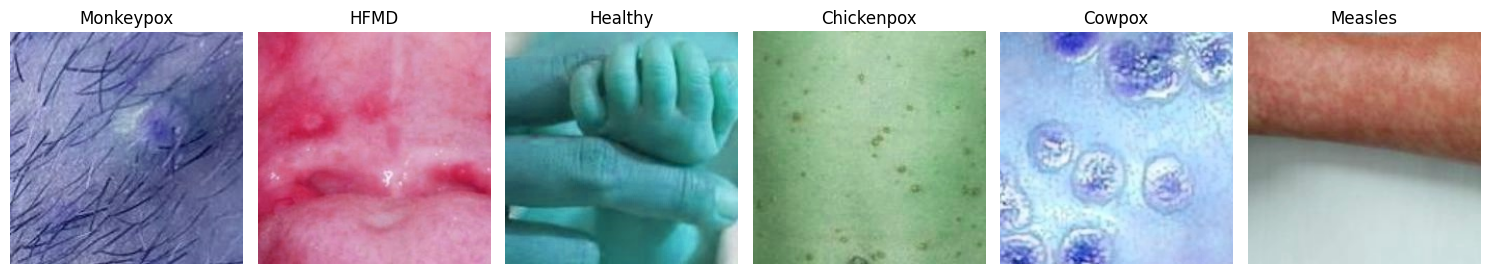

In [21]:
for i in range(len(df)):
    if not os.path.isfile(df['Image_Path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {df['Image_Path'].iloc[i]}")

class_images = df.drop_duplicates(subset='Diagnosis')

def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_Path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()
plot_class_images(class_images)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201960 entries, 0 to 201959
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Image_Id                 201960 non-null  object
 1   Diagnosis                201960 non-null  object
 2   Image_Path               201960 non-null  object
 3   Fold                     201960 non-null  object
 4   Split                    201960 non-null  object
 5   Updated_Diagnosis_Label  201960 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 9.2+ MB
